In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('../data/backpack_men.csv', index_col=0)


In [3]:
df

,total_revenue
date,
2019-06-04,293.255284
2019-06-05,81.365330
2019-06-06,82.644961
2019-06-07,46.697338
2019-06-11,85.229798
...,...
2022-01-08,74.655674
2022-01-09,23.369566
2022-01-10,39.272093


In [4]:
df.index = pd.to_datetime(df.index)

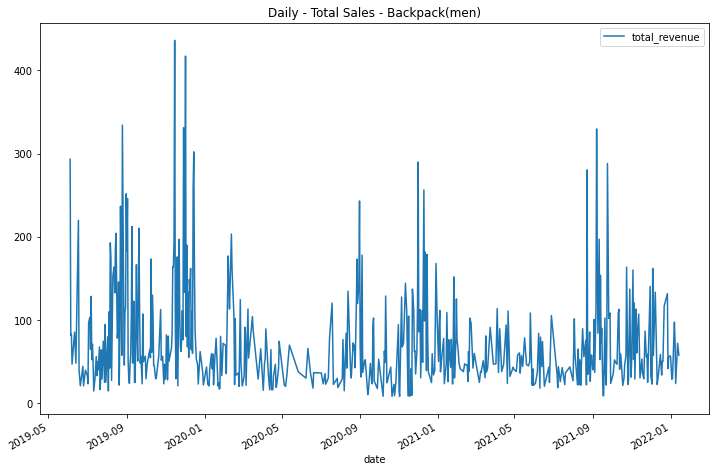

In [5]:
plt.rcParams["figure.figsize"] = (12, 8)
df.plot()
plt.title('Daily - Total Sales - Backpack(men)')
plt.show()

In [6]:
# Check for stationery 

from statsmodels.tsa.stattools import adfuller

X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

    
    


ADF Statistic: -5.910552
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [25]:
from pmdarima.arima.utils import ndiffs

ndiffs(df, test='adf')

# to select d#

0

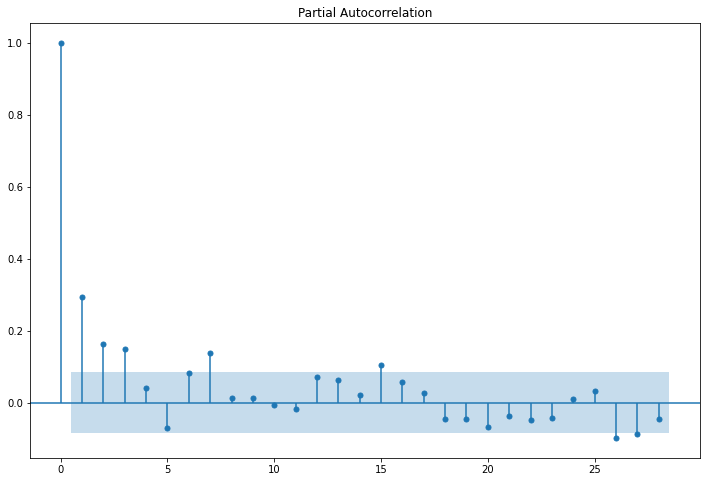

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df);

# to get the p#

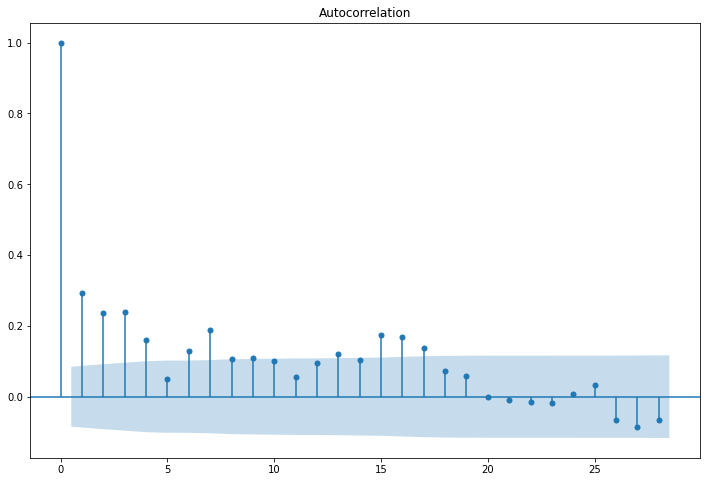

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df);

# to get the q#

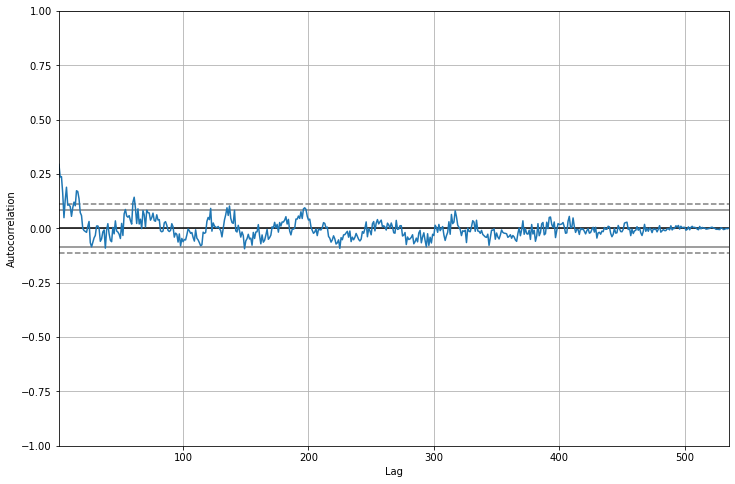

In [21]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(X)
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


model = ARIMA(X, order=(4,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  535
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -2912.718
Date:                Thu, 17 Feb 2022   AIC                           5837.436
Time:                        22:53:28   BIC                           5863.118
Sample:                             0   HQIC                          5847.485
                                - 535                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2109      0.038      5.594      0.000       0.137       0.285
ar.L2          0.1142      0.040      2.838      0.005       0.035       0.193
ar.L3          0.1333      0.033      4.064      0.0

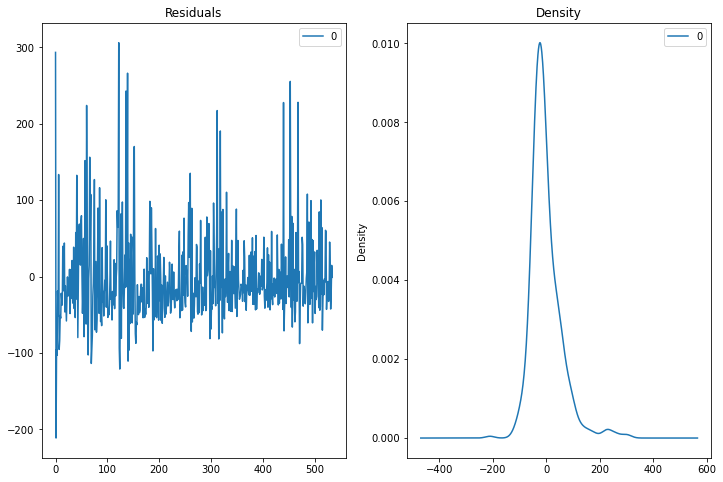

In [9]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [10]:
X = df.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4, 1, 1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)



predicted=51.147932, expected=80.658915
predicted=62.015425, expected=37.046014
predicted=54.973868, expected=42.132093
predicted=58.067068, expected=90.999391
predicted=66.307063, expected=46.696521
predicted=60.206541, expected=47.064215
predicted=62.125811, expected=113.565325
predicted=74.306224, expected=36.640326
predicted=61.040212, expected=89.297826
predicted=75.645492, expected=37.723597
predicted=58.108871, expected=46.133134
predicted=60.519209, expected=93.812325
predicted=67.328245, expected=23.560969
predicted=55.052833, expected=110.613121
predicted=76.378157, expected=31.936822
predicted=57.041189, expected=43.125798
predicted=61.859092, expected=40.617442
predicted=52.130488, expected=37.907948
predicted=51.578664, expected=57.627132
predicted=55.993780, expected=60.218605
predicted=58.605033, expected=35.952000
predicted=55.335705, expected=45.050302
predicted=55.168774, expected=56.967290
predicted=55.806429, expected=43.992965
predicted=54.827396, expected=78.28004

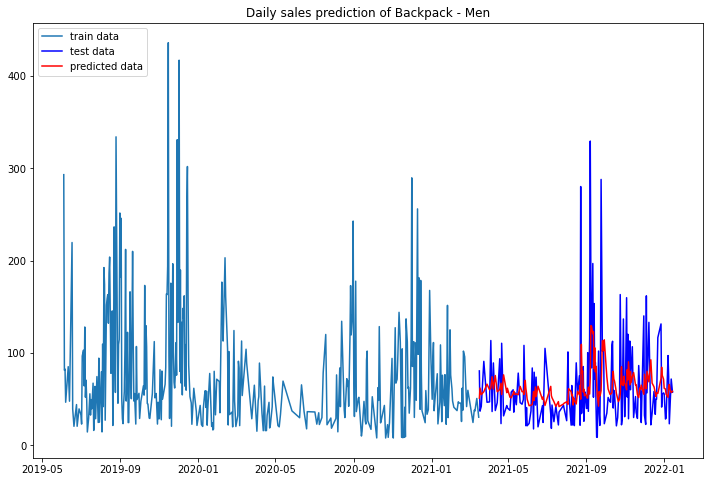

In [14]:
# plot forecasts against actual outcomes

plt.plot(df[:size].index, train, label='train data')
plt.plot(df[size:].index, test, color='blue', label='test data')
plt.plot(df[size:].index, predictions, color='red', label='predicted data')
plt.legend(loc="upper left")
plt.title('Daily sales prediction of Backpack - Men')
plt.show()

In [15]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



mape=mean_absolute_percentage_error(test, predictions)
print('MAPE: ', mape)

MAPE:  76.190642667051


In [52]:
forecast = model_fit.forecast(steps=30)


day=1
for yhat in forecast:
    print('Day {}: {}'.format(day,yhat))
    day = day + 1

Day 1: 58.55246373194781
Day 2: 60.08744432482159
Day 3: 63.69941791670548
Day 4: 63.81768400919963
Day 5: 64.07084064904141
Day 6: 64.66398194652773
Day 7: 64.93938167856663
Day 8: 65.10238442217593
Day 9: 65.25465652672031
Day 10: 65.35943147454947
Day 11: 65.42869231416887
Day 12: 65.48032268602535
Day 13: 65.51753619550756
Day 14: 65.54357416242276
Day 15: 65.56222086231155
Day 16: 65.57559580239025
Day 17: 65.58510402165443
Day 18: 65.59188296277065
Day 19: 65.59672607722945
Day 20: 65.6001798105831
Day 21: 65.60264268028811
Day 22: 65.60440013387579
Day 23: 65.60565390374845
Day 24: 65.60654821846246
Day 25: 65.60718622557049
Day 26: 65.60764137950054
Day 27: 65.60796607003647
Day 28: 65.60819769754401
Day 29: 65.60836293737395
Day 30: 65.60848081583997


In [44]:
# Hypertuning the parameters

import warnings
warnings.filterwarnings("ignore")

In [45]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.7)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
    
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
        
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [46]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    

In [48]:
# evaluate parameters
p_values = [4,5]
d_values = range(1, 2)
q_values = range(1, 2)
warnings.filterwarnings("ignore")
evaluate_models(df.values, p_values, d_values, q_values)


ARIMA(4, 1, 1) MSE=2447.700
ARIMA(5, 1, 1) MSE=2486.051
Best ARIMA(4, 1, 1) MSE=2447.700
